# Analysis of wind and solar energy data

## Reading the data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import seaborn as sns

#import only second sheet
df = pd.read_excel('new_format-2020 (3).xlsx', sheet_name='SupIm')
df['date'] = pd.date_range(start='1/1/2020', periods=len(df), freq='H')
df = df.set_index('date')

#view DataFrame: all the data
#df

#view DataFrame head: some elements of the data
print(df.head)
#print(list(df))

#view columns
#print(df.columns)

<bound method NDFrame.head of                         t  SouthWest.Wind (m/s)  SouthWest.Solar (kJ/m2)  \
date                                                                       
2020-01-01 00:00:00     0              6.471513                      0.0   
2020-01-01 01:00:00     1              7.327003                      0.0   
2020-01-01 02:00:00     2              8.556605                      0.0   
2020-01-01 03:00:00     3              7.579646                      0.0   
2020-01-01 04:00:00     4              7.816800                      0.0   
...                   ...                   ...                      ...   
2020-12-30 19:00:00  8755             17.370674                      0.0   
2020-12-30 20:00:00  8756             17.697677                      0.0   
2020-12-30 21:00:00  8757             16.061313                      0.0   
2020-12-30 22:00:00  8758             15.209872                      0.0   
2020-12-30 23:00:00  8759             14.274141           

## Plot wind data & solar data

Text(0.5, 0.98, 'Hourly wind speed and solar irradiation')

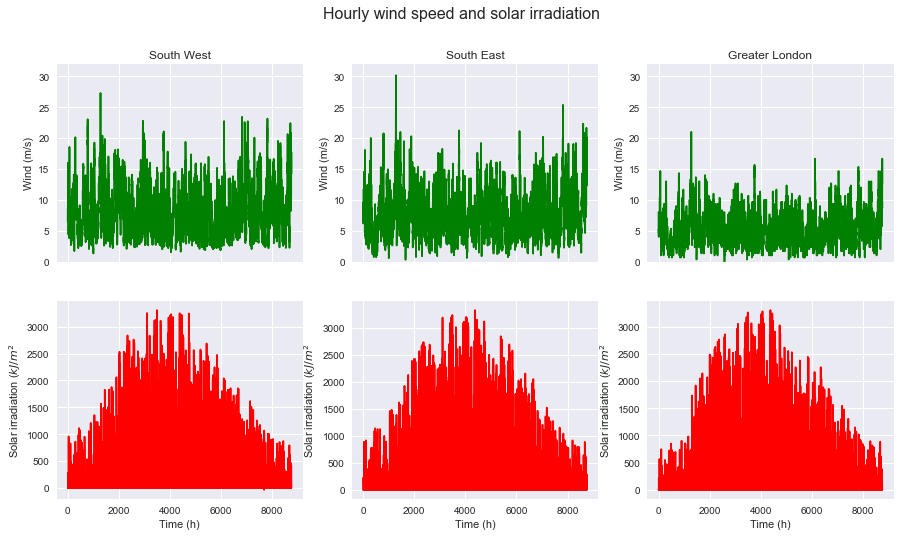

In [125]:
wind_color = 'green'
solar_color= 'red'
wind_column = ['SouthWest.Wind (m/s)','SouthEast.Wind (m/s)','GreaterLondon.Wind (m/s)']
solar_column = ['SouthWest.Solar (kJ/m2)','SouthEast.Solar (kJ/m2)','GreaterLondon.Solar (kJ/m2)']
label = ['South West', 'South East', 'Greater London']
solar_label = 'Solar irradiation ($kJ/m^2$'
wind_label = 'Wind (m/s)'
    
mpl.style.use('seaborn')
#Plot daily average
fig,ax =  plt.subplots(2,3,figsize=(15,8), sharex=True)
#x_ticks = pd.date_range(start='01/01/2020', end='12/31/2020', freq='3MS')
for i in [0,1,2]:
    axx = ax[0][i]
    x = df['t']
    y = df[wind_column[i]]
    axx.plot(x, y,label=label[i],color=wind_color)
    axx.set_ylabel(wind_label)
    axx.set_ylim(0,32)
    axx.title.set_text(label[i])
for i in [0,1,2]:
    axx = ax[1][i]
    x = df['t']
    y = df[solar_column[i]]
    axx.plot(x,y,label=label[i],color=solar_color)
    axx.set_ylabel(solar_label)
    axx.set_xlabel('Time (h)')
fig.suptitle('Hourly wind speed and solar irradiation', fontsize=16) 

Text(0.5, 0.98, 'Daily average of wind speed and solar irradiation')

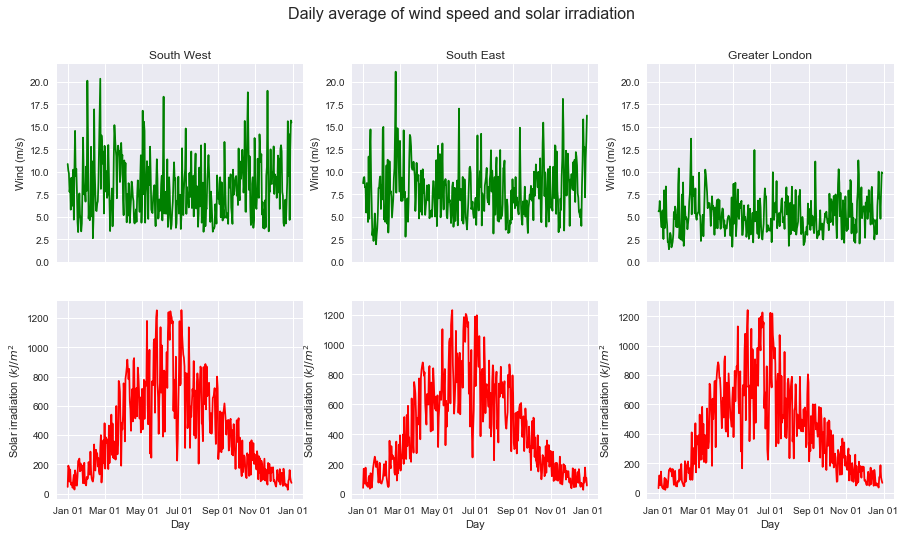

In [118]:
#Plot daily average
dfd = df.resample('D').mean()
fig,ax =  plt.subplots(2,3,figsize=(15,8), sharex=True)
#x_ticks = pd.date_range(start='01/01/2020', end='12/31/2020', freq='3MS')
for i in [0,1,2]:
    axx = ax[0][i]
    axx.plot(dfd[wind_column[i]],label=label[i],color=wind_color)
    axx.set_ylabel(wind_label)
    axx.set_ylim(0,22)
    axx.title.set_text(label[i])
    axx.xaxis.set_major_formatter(mdates.DateFormatter("%h %d"))
for i in [0,1,2]:
    axx = ax[1][i]
    axx.plot(dfd[solar_column[i]],label=label[i],color=solar_color)
    axx.set_ylabel(solar_label)
    axx.set_xlabel('Day')
    axx.xaxis.set_major_formatter(mdates.DateFormatter("%h %d"))
fig.suptitle('Daily average of wind speed and solar irradiation', fontsize=16)

# Hourly distribution

In [126]:
#Hourly distribution
#Not needed as seaborn does the mean automatically
dfh = df.groupby(df.index.hour).mean()
dfh_std = df.groupby(df.index.hour).std()
dfh_std

,t,SouthWest.Wind (m/s),SouthWest.Solar (kJ/m2),SouthEast.Wind (m/s),SouthEast.Solar (kJ/m2),GreaterLondon.Wind (m/s),GreaterLondon.Solar (kJ/m2)
date,,,,,,,
0,2532.255911,3.649613,0.000000,3.521607,0.000000,2.265730,0.000000
1,2532.255911,3.744352,0.000000,3.439663,0.000000,2.309793,0.000000
2,2532.255911,3.733487,0.000000,3.409653,0.000000,2.354422,0.000000
3,2532.255911,3.810424,0.000000,3.418149,0.000000,2.358508,0.000000
4,2532.255911,3.865414,0.079471,3.491838,1.981364,2.261533,0.090225
5,2532.255911,3.951126,20.995619,3.535196,27.815943,2.325030,20.126773
6,2532.255911,4.001236,114.674252,3.526817,120.905428,2.343204,111.808747
7,2532.255911,3.981935,270.819517,3.672281,275.179702,2.441840,274.265009
8,2532.255911,4.004222,451.714444,3.727479,461.684224,2.464247,461.380450


## Plotting hourly distributions

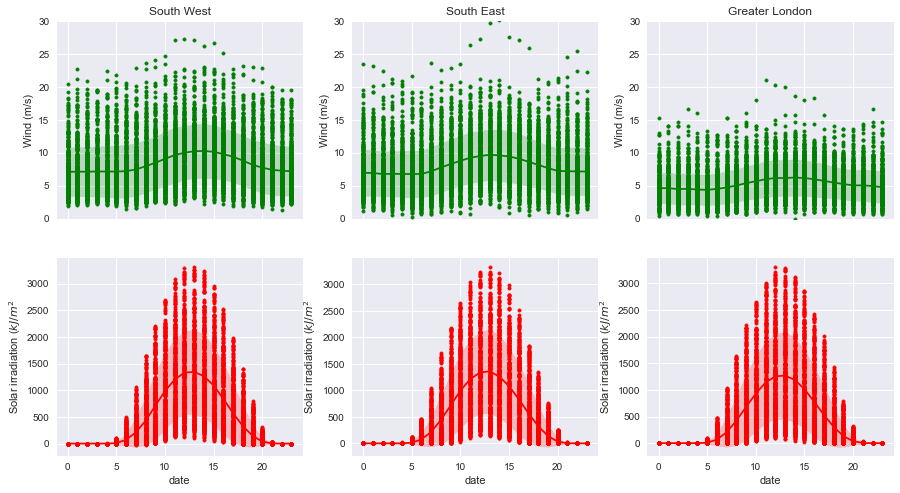

In [127]:
#create figure, and axes
mpl.style.use('seaborn')
fig,ax =  plt.subplots(2,3,figsize=(15,8), sharex=True)

for i in [0,1,2]:
    y=df[wind_column[i]]
    x=df.index.hour
    ax[0][i].set_ylabel(wind_label)
    ax[0][i].set_ylim(0,30)
    sns.lineplot(ax=ax[0][i], x=x, y=y,ci='sd',color=wind_color)
    ax[0][i].scatter(x=x, y=y, marker='.',color=wind_color)
    ax[0][i].title.set_text(label[i])
for i in [0,1,2]:
    y=df[solar_column[i]]
    x=df.index.hour
    ax[1][i].set_ylabel(solar_label)
    sns.lineplot(ax=ax[1][i], x=x, y=y,ci='sd',color=solar_color)
    ax[1][i].scatter(x=x, y=y, marker='.',color=solar_color)
